## Import Depencies and read in the meta data

In [1]:
# Import Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import gradio as gr
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import numpy as np
# Load the TensorBoard notebook extension
%reload_ext tensorboard
import datetime

In [2]:
df_weapons = pd.read_csv('../Resources/metadata.csv')
df_weapons

,imagefile,labelfile,target,train_id
0,Automatic Rifle_10.jpeg,Automatic Rifle_10.txt,0,1
1,Automatic Rifle_100.jpeg,Automatic Rifle_100.txt,0,1
2,Automatic Rifle_11.jpeg,Automatic Rifle_11.txt,0,1
3,Automatic Rifle_12.jpeg,Automatic Rifle_12.txt,0,1
4,Automatic Rifle_13.jpeg,Automatic Rifle_13.txt,0,0
...,...,...,...,...
709,Sword_95.jpeg,Sword_95.txt,8,1
710,Sword_96.jpeg,Sword_96.txt,8,0
711,Sword_97.jpeg,Sword_97.txt,8,1
712,Sword_98.jpeg,Sword_98.txt,8,1


In [3]:
# Split .txt and number
df_weapons[['Class', 'weapon_id']] = df_weapons['labelfile']\
                                            .str.replace('.txt', '', regex=False)\
                                            .str.split('_', expand=True)
# Drop initial column 
len(df_weapons),df_weapons.head()


(714,
                   imagefile                labelfile  target  train_id  \
 0   Automatic Rifle_10.jpeg   Automatic Rifle_10.txt       0         1   
 1  Automatic Rifle_100.jpeg  Automatic Rifle_100.txt       0         1   
 2   Automatic Rifle_11.jpeg   Automatic Rifle_11.txt       0         1   
 3   Automatic Rifle_12.jpeg   Automatic Rifle_12.txt       0         1   
 4   Automatic Rifle_13.jpeg   Automatic Rifle_13.txt       0         0   
 
              Class weapon_id  
 0  Automatic Rifle        10  
 1  Automatic Rifle       100  
 2  Automatic Rifle        11  
 3  Automatic Rifle        12  
 4  Automatic Rifle        13  )

In [4]:
# Build a list of imported images
base_path = "../Resources/weapon_detection/train/images/"
images_weapons = []

for df_split in range(len(df_weapons)):
    filename = df_weapons.iloc[df_split,0]
    path = base_path + filename
    print(f'{df_split} of {len(df_weapons)}: Attempting to import {filename}')
    try:
        images_weapons.append(Image.open(path).convert('RGB'))
    except:
        print(f'FAILED: {filename}')

        
len(df_weapons),len(images_weapons),images_weapons

0 of 714: Attempting to import Automatic Rifle_10.jpeg
1 of 714: Attempting to import Automatic Rifle_100.jpeg
2 of 714: Attempting to import Automatic Rifle_11.jpeg
3 of 714: Attempting to import Automatic Rifle_12.jpeg
4 of 714: Attempting to import Automatic Rifle_13.jpeg
FAILED: Automatic Rifle_13.jpeg
5 of 714: Attempting to import Automatic Rifle_14.jpeg
6 of 714: Attempting to import Automatic Rifle_15.png
7 of 714: Attempting to import Automatic Rifle_16.png
8 of 714: Attempting to import Automatic Rifle_17.jpeg
9 of 714: Attempting to import Automatic Rifle_18.png
10 of 714: Attempting to import Automatic Rifle_19.jpeg
FAILED: Automatic Rifle_19.jpeg
11 of 714: Attempting to import Automatic Rifle_20.jpeg
12 of 714: Attempting to import Automatic Rifle_21.jpeg
13 of 714: Attempting to import Automatic Rifle_22.jpeg
14 of 714: Attempting to import Automatic Rifle_23.jpeg
15 of 714: Attempting to import Automatic Rifle_24.jpeg
16 of 714: Attempting to import Automatic Rifle_25.j

c:\Users\nick\.conda\envs\dev\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


123 of 714: Attempting to import Bazooka_74.jpeg
FAILED: Bazooka_74.jpeg
124 of 714: Attempting to import Bazooka_75.png
125 of 714: Attempting to import Bazooka_76.png
FAILED: Bazooka_76.png
126 of 714: Attempting to import Bazooka_77.jpeg
127 of 714: Attempting to import Bazooka_78.jpeg
FAILED: Bazooka_78.jpeg
128 of 714: Attempting to import Bazooka_79.jpeg
129 of 714: Attempting to import Bazooka_8.jpeg
130 of 714: Attempting to import Bazooka_80.jpeg
131 of 714: Attempting to import Bazooka_81.jpeg
132 of 714: Attempting to import Bazooka_82.jpeg
FAILED: Bazooka_82.jpeg
133 of 714: Attempting to import Bazooka_83.jpeg
134 of 714: Attempting to import Bazooka_84.jpeg
135 of 714: Attempting to import Bazooka_85.jpeg
136 of 714: Attempting to import Bazooka_86.jpeg
FAILED: Bazooka_86.jpeg
137 of 714: Attempting to import Bazooka_87.jpeg
138 of 714: Attempting to import Bazooka_96.jpeg
139 of 714: Attempting to import Bazooka_98.jpeg
140 of 714: Attempting to import Bazooka_99.jpeg
14

(714,
 571,
 [<PIL.Image.Image image mode=RGB size=1280x720>,
  <PIL.Image.Image image mode=RGB size=1000x750>,
  <PIL.Image.Image image mode=RGB size=1920x1080>,
  <PIL.Image.Image image mode=RGB size=750x450>,
  <PIL.Image.Image image mode=RGB size=1280x720>,
  <PIL.Image.Image image mode=RGB size=512x512>,
  <PIL.Image.Image image mode=RGB size=2500x980>,
  <PIL.Image.Image image mode=RGB size=1751x1110>,
  <PIL.Image.Image image mode=RGB size=900x356>,
  <PIL.Image.Image image mode=RGB size=1280x946>,
  <PIL.Image.Image image mode=RGB size=550x240>,
  <PIL.Image.Image image mode=RGB size=768x439>,
  <PIL.Image.Image image mode=RGB size=547x280>,
  <PIL.Image.Image image mode=RGB size=800x600>,
  <PIL.Image.Image image mode=RGB size=480x360>,
  <PIL.Image.Image image mode=RGB size=774x1080>,
  <PIL.Image.Image image mode=RGB size=907x382>,
  <PIL.Image.Image image mode=RGB size=1200x671>,
  <PIL.Image.Image image mode=RGB size=493x450>,
  <PIL.Image.Image image mode=RGB size=480x360

In [5]:
# Remove files without images
df_weapons = df_weapons.loc[df_weapons['train_id'] != 0]
df_weapons = df_weapons.reset_index()
df_weapons = df_weapons.drop('index',axis=1)
df_weapons,len(images_weapons)

(                    imagefile                labelfile  target  train_id  \
 0     Automatic Rifle_10.jpeg   Automatic Rifle_10.txt       0         1   
 1    Automatic Rifle_100.jpeg  Automatic Rifle_100.txt       0         1   
 2     Automatic Rifle_11.jpeg   Automatic Rifle_11.txt       0         1   
 3     Automatic Rifle_12.jpeg   Automatic Rifle_12.txt       0         1   
 4     Automatic Rifle_14.jpeg   Automatic Rifle_14.txt       0         1   
 ..                        ...                      ...     ...       ...   
 566             Sword_93.jpeg             Sword_93.txt       8         1   
 567             Sword_94.jpeg             Sword_94.txt       8         1   
 568             Sword_95.jpeg             Sword_95.txt       8         1   
 569             Sword_97.jpeg             Sword_97.txt       8         1   
 570             Sword_98.jpeg             Sword_98.txt       8         1   
 
                Class weapon_id  
 0    Automatic Rifle        10  
 1    

In [6]:
df_weapons['general'] = 1
df_weapons


,imagefile,labelfile,target,train_id,Class,weapon_id,general
0,Automatic Rifle_10.jpeg,Automatic Rifle_10.txt,0,1,Automatic Rifle,10,1
1,Automatic Rifle_100.jpeg,Automatic Rifle_100.txt,0,1,Automatic Rifle,100,1
2,Automatic Rifle_11.jpeg,Automatic Rifle_11.txt,0,1,Automatic Rifle,11,1
3,Automatic Rifle_12.jpeg,Automatic Rifle_12.txt,0,1,Automatic Rifle,12,1
4,Automatic Rifle_14.jpeg,Automatic Rifle_14.txt,0,1,Automatic Rifle,14,1
...,...,...,...,...,...,...,...
566,Sword_93.jpeg,Sword_93.txt,8,1,Sword,93,1
567,Sword_94.jpeg,Sword_94.txt,8,1,Sword,94,1
568,Sword_95.jpeg,Sword_95.txt,8,1,Sword,95,1
569,Sword_97.jpeg,Sword_97.txt,8,1,Sword,97,1


In [7]:
# Reading the meta file containing all image file names
df_general = pd.read_csv("../Resources/dataset/train_2.csv")
df_general

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous
...,...,...
565,image6083.jpg,Miscellaneous
566,image4815.jpg,Jacket
567,image2269.jpg,Snowman
568,image7804.jpg,Christmas_Tree


In [8]:
df_general[['type', 'file']] = df_general['Image'].str.split('image', n=1, expand=True)
df_general = df_general[['Image','Class','file']]
df_general


,Image,Class,file
0,image3476.jpg,Miscellaneous,3476.jpg
1,image5198.jpg,Candle,5198.jpg
2,image4183.jpg,Snowman,4183.jpg
3,image1806.jpg,Miscellaneous,1806.jpg
4,image7831.jpg,Miscellaneous,7831.jpg
...,...,...,...
565,image6083.jpg,Miscellaneous,6083.jpg
566,image4815.jpg,Jacket,4815.jpg
567,image2269.jpg,Snowman,2269.jpg
568,image7804.jpg,Christmas_Tree,7804.jpg


In [9]:
df_general[['number', 'delete']] = df_general['file'].str.split('.', n=1, expand=True)
df_general = df_general.sort_index(ascending=True)
df_general

,Image,Class,file,number,delete
0,image3476.jpg,Miscellaneous,3476.jpg,3476,jpg
1,image5198.jpg,Candle,5198.jpg,5198,jpg
2,image4183.jpg,Snowman,4183.jpg,4183,jpg
3,image1806.jpg,Miscellaneous,1806.jpg,1806,jpg
4,image7831.jpg,Miscellaneous,7831.jpg,7831,jpg
...,...,...,...,...,...
565,image6083.jpg,Miscellaneous,6083.jpg,6083,jpg
566,image4815.jpg,Jacket,4815.jpg,4815,jpg
567,image2269.jpg,Snowman,2269.jpg,2269,jpg
568,image7804.jpg,Christmas_Tree,7804.jpg,7804,jpg


In [10]:
# Build a list of imported images
base_path = "../Resources/dataset/train/"
images_general = []

for df_split in range(len(df_general)):
    filename = df_general.iloc[df_split,0]
    path = base_path + filename
    print(f'{df_split} of {len(df_general)}: Attempting to import {filename}')
    try:
        images_general.append(Image.open(path).convert('RGB'))
        
    except:
        print(f'FAILED: {filename}')

        
len(images_general),images_general

0 of 570: Attempting to import image3476.jpg
1 of 570: Attempting to import image5198.jpg
2 of 570: Attempting to import image4183.jpg
3 of 570: Attempting to import image1806.jpg
4 of 570: Attempting to import image7831.jpg
5 of 570: Attempting to import image537.jpg
6 of 570: Attempting to import image9774.jpg
7 of 570: Attempting to import image5365.jpg
8 of 570: Attempting to import image9367.jpg
9 of 570: Attempting to import image4819.jpg
10 of 570: Attempting to import image4191.jpg
11 of 570: Attempting to import image6764.jpg
12 of 570: Attempting to import image8345.jpg
13 of 570: Attempting to import image3198.jpg
14 of 570: Attempting to import image7076.jpg
15 of 570: Attempting to import image2257.jpg
16 of 570: Attempting to import image7771.jpg
17 of 570: Attempting to import image7391.jpg
18 of 570: Attempting to import image8473.jpg
19 of 570: Attempting to import image4470.jpg
20 of 570: Attempting to import image9387.jpg
21 of 570: Attempting to import image9663.jpg

(570,
 [<PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x63>,
  <PIL.Image.Image image mode=RGB size=80x120>,
  <PIL.Image.Image image mode=RGB size=80x50>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x113>,
  <PIL.Image.Image image mode=RGB size=80x88>,
  <PIL.Image.Image image mode=RGB size=80x107>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x107>,
  <PIL.Image.Image image mode=RGB size=80x125>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x119>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x107>,
  <PIL.Image.Image image mode=RGB size=80x120>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x80>,

In [11]:
df_general['general'] = 0
df_general

,Image,Class,file,number,delete,general
0,image3476.jpg,Miscellaneous,3476.jpg,3476,jpg,0
1,image5198.jpg,Candle,5198.jpg,5198,jpg,0
2,image4183.jpg,Snowman,4183.jpg,4183,jpg,0
3,image1806.jpg,Miscellaneous,1806.jpg,1806,jpg,0
4,image7831.jpg,Miscellaneous,7831.jpg,7831,jpg,0
...,...,...,...,...,...,...
565,image6083.jpg,Miscellaneous,6083.jpg,6083,jpg,0
566,image4815.jpg,Jacket,4815.jpg,4815,jpg,0
567,image2269.jpg,Snowman,2269.jpg,2269,jpg,0
568,image7804.jpg,Christmas_Tree,7804.jpg,7804,jpg,0


In [12]:
images = images_general + images_weapons
len(images),images

(1141,
 [<PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x63>,
  <PIL.Image.Image image mode=RGB size=80x120>,
  <PIL.Image.Image image mode=RGB size=80x50>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x113>,
  <PIL.Image.Image image mode=RGB size=80x88>,
  <PIL.Image.Image image mode=RGB size=80x107>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x107>,
  <PIL.Image.Image image mode=RGB size=80x125>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x119>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x107>,
  <PIL.Image.Image image mode=RGB size=80x120>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x80>

In [13]:
df_weapons['Image'] = df_weapons['imagefile']
df = df_weapons[['Image','general']]
df

,Image,general
0,Automatic Rifle_10.jpeg,1
1,Automatic Rifle_100.jpeg,1
2,Automatic Rifle_11.jpeg,1
3,Automatic Rifle_12.jpeg,1
4,Automatic Rifle_14.jpeg,1
...,...,...
566,Sword_93.jpeg,1
567,Sword_94.jpeg,1
568,Sword_95.jpeg,1
569,Sword_97.jpeg,1


In [14]:
df_general = df_general[['Image','general']]
df_general

,Image,general
0,image3476.jpg,0
1,image5198.jpg,0
2,image4183.jpg,0
3,image1806.jpg,0
4,image7831.jpg,0
...,...,...
565,image6083.jpg,0
566,image4815.jpg,0
567,image2269.jpg,0
568,image7804.jpg,0


In [15]:
df = pd.concat([df,df_general]).reset_index()
df

,index,Image,general
0,0,Automatic Rifle_10.jpeg,1
1,1,Automatic Rifle_100.jpeg,1
2,2,Automatic Rifle_11.jpeg,1
3,3,Automatic Rifle_12.jpeg,1
4,4,Automatic Rifle_14.jpeg,1
...,...,...,...
1136,565,image6083.jpg,0
1137,566,image4815.jpg,0
1138,567,image2269.jpg,0
1139,568,image7804.jpg,0


## Pre-process images to prep for splitting into training and testing data

In [16]:
# Check all the sizes into a list, then convert to a set
sizes = set([img.size for img in images])
sizes



{(80, 38),
 (80, 41),
 (80, 42),
 (80, 45),
 (80, 46),
 (80, 47),
 (80, 48),
 (80, 49),
 (80, 50),
 (80, 51),
 (80, 52),
 (80, 53),
 (80, 54),
 (80, 55),
 (80, 56),
 (80, 57),
 (80, 58),
 (80, 59),
 (80, 60),
 (80, 61),
 (80, 62),
 (80, 63),
 (80, 64),
 (80, 65),
 (80, 66),
 (80, 69),
 (80, 71),
 (80, 73),
 (80, 74),
 (80, 75),
 (80, 76),
 (80, 77),
 (80, 80),
 (80, 82),
 (80, 86),
 (80, 88),
 (80, 90),
 (80, 91),
 (80, 92),
 (80, 93),
 (80, 94),
 (80, 95),
 (80, 97),
 (80, 98),
 (80, 100),
 (80, 103),
 (80, 105),
 (80, 106),
 (80, 107),
 (80, 108),
 (80, 109),
 (80, 110),
 (80, 111),
 (80, 112),
 (80, 113),
 (80, 115),
 (80, 118),
 (80, 119),
 (80, 120),
 (80, 121),
 (80, 122),
 (80, 123),
 (80, 125),
 (80, 126),
 (80, 135),
 (80, 142),
 (80, 171),
 (80, 188),
 (220, 140),
 (250, 200),
 (260, 280),
 (270, 323),
 (275, 275),
 (283, 879),
 (295, 280),
 (300, 200),
 (315, 681),
 (320, 320),
 (334, 500),
 (348, 210),
 (351, 500),
 (354, 500),
 (355, 239),
 (355, 282),
 (355, 355),
 (364, 

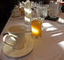

In [17]:
# Use a for loop to resize all images to 64 by 60
target_size = (64, 60)

resized_images = [img.resize(target_size, resample = Image.LANCZOS) for img in images]

resized_images[1]


In [18]:
# Check images resizing
sizes = set([img.size for img in resized_images])
sizes

{(64, 60)}

In [19]:
# Convert all images to floating point numpy arrays
float_images = [np.array(img).astype(np.float32) for img in resized_images]

#print(float_images.shape)
print(float_images[0])


[[[ 64. 107.  89.]
  [ 51. 111.  69.]
  [ 76. 143.  78.]
  ...
  [ 65.  81.  83.]
  [ 87. 106. 112.]
  [ 30.  48.  58.]]

 [[ 75. 103.  91.]
  [ 65. 114.  76.]
  [ 87. 154.  91.]
  ...
  [ 85. 102. 102.]
  [ 36.  55.  59.]
  [ 36.  55.  63.]]

 [[ 74.  79.  79.]
  [ 60.  96.  66.]
  [ 64. 131.  71.]
  ...
  [ 54.  70.  69.]
  [ 10.  28.  30.]
  [ 55.  75.  78.]]

 ...

 [[113. 100.  83.]
  [104.  91.  77.]
  [ 94.  84.  73.]
  ...
  [ 41.  40.  32.]
  [ 58.  54.  49.]
  [ 85.  80.  76.]]

 [[115. 102.  85.]
  [ 92.  79.  66.]
  [ 96.  85.  75.]
  ...
  [144. 143. 135.]
  [139. 135. 130.]
  [140. 135. 131.]]

 [[103.  89.  75.]
  [ 96.  82.  70.]
  [ 81.  69.  62.]
  ...
  [181. 180. 172.]
  [185. 181. 176.]
  [204. 199. 195.]]]


In [20]:
# normalize images to a range between 0 and 1 by
# dividing all pixel values by the max of 255

normalized_images = [img/255 for img in float_images]

# Display the pixel values 
print("Pixel Values:")
print(normalized_images[0].shape)
print(normalized_images[0])


Pixel Values:
(60, 64, 3)
[[[0.2509804  0.41960785 0.34901962]
  [0.2        0.43529412 0.27058825]
  [0.29803923 0.56078434 0.30588236]
  ...
  [0.25490198 0.31764707 0.3254902 ]
  [0.34117648 0.41568628 0.4392157 ]
  [0.11764706 0.1882353  0.22745098]]

 [[0.29411766 0.40392157 0.35686275]
  [0.25490198 0.44705883 0.29803923]
  [0.34117648 0.6039216  0.35686275]
  ...
  [0.33333334 0.4        0.4       ]
  [0.14117648 0.21568628 0.23137255]
  [0.14117648 0.21568628 0.24705882]]

 [[0.2901961  0.30980393 0.30980393]
  [0.23529412 0.3764706  0.25882354]
  [0.2509804  0.5137255  0.2784314 ]
  ...
  [0.21176471 0.27450982 0.27058825]
  [0.03921569 0.10980392 0.11764706]
  [0.21568628 0.29411766 0.30588236]]

 ...

 [[0.44313726 0.39215687 0.3254902 ]
  [0.40784314 0.35686275 0.3019608 ]
  [0.36862746 0.32941177 0.28627452]
  ...
  [0.16078432 0.15686275 0.1254902 ]
  [0.22745098 0.21176471 0.19215687]
  [0.33333334 0.3137255  0.29803923]]

 [[0.4509804  0.4        0.33333334]
  [0.360784

In [21]:
# Set X and y values
X = normalized_images
y = df['general']
# Check value lengths for X and y variables
X[0].shape

(60, 64, 3)

In [22]:
# Convert values to numpy arrays
y = np.array(y).reshape(-1,1)
X = np.array(X)

In [23]:
y.shape

(1141, 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


## Augment to get more samples

In [25]:
# Apply augmentation to the whole training dataset
# Define the augmentation pipeline
augmentation_model = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),         
    tf.keras.layers.RandomTranslation(0.1, 0.1),
    tf.keras.layers.RandomZoom(0.2),            
    tf.keras.layers.RandomFlip('horizontal')     
])


In [26]:

# Create variables to hold the X and y training data
X_train_aug = []
y_train_aug = []

# Loop through all the images
for i in range(len(X_train)):
    # Select the image
    img = X_train[i]
    # Select the label from the training data
    label = y_train[i]
    
    ## Ensure that the input data has the correct shape
    img = np.expand_dims(img, axis=0)  

    
    # Add 5 images for every original image
    for j in range(50):
        # Append a new image to the X list
        X_train_aug.append(augmentation_model(img, training=True)[0].numpy())
        #print(X_train_aug[0].shape)
        
        # Append the label for the original image to the y list
        y_train_aug.append(label)
        #print(y_train_aug[0].shape)
# Print the length of each list
print(len(X_train_aug))
print(len(y_train_aug))
X_train_aug[0].shape,y_train_aug[0].shape

42750
42750


((60, 64, 3), (1,))

In [27]:
# Reshape test data for the model
X_test_np = []
for img in X_test:
    
    # Append the image to the list
    X_test_np.append(img)

# Convert to numpy array
X_test_np = np.array(X_test_np)

# Check the shape of the first image
X_test_np[0].shape,len(X_test_np)

((60, 64, 3), 286)

In [28]:
## One hot encode the y data
y_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(np.array(y_train_aug).reshape(-1, 1))
y_train_aug_enc = y_encoder.transform(np.array(y_train_aug).reshape(-1, 1))
y_test_enc = y_encoder.transform(np.array(y_test).reshape(-1, 1))
y_train_aug_enc,y_test_enc

(array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 

In [29]:
# Convert values to numpy arrays
X_train_aug_np = np.array(X_train_aug)
X_test_np = np.array(X_test_np)
y_train_aug_np = np.array(y_train_aug_enc)
y_test_np = np.array(y_test_enc)

# Split the training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_aug_np, y_train_aug, test_size=0.2, random_state=42)

# Print the total number of one_hot_encoded columns
len(y_train),len(X_train)

(34200, 34200)

In [30]:
y_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(np.array(y_train).reshape(-1, 1))
y_train = y_encoder.transform(np.array(y_train).reshape(-1, 1))
y_val = y_encoder.transform(np.array(y_val).reshape(-1, 1))
len(y_train),len(y_val)

(34200, 8550)

## Create a CNN model

In [81]:
# Define a CNN model
model = keras.Sequential([
    layers.Conv2D(96, (3, 3), activation='relu', input_shape=(60, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(128, (3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(64, (3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    layers.Conv2D(36, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(2, activation='sigmoid') 
])


In [82]:

# Compile the model
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['accuracy'])


In [33]:
%reload_ext tensorboard

In [34]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [83]:

# Train the model
batch_size = 3500
epochs = 30
history = model.fit(
    x=X_train, y=y_train,
    validation_data=(X_val,y_val),
    epochs=epochs,
    callbacks=[tensorboard_callback]
)

Epoch 1/30
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 51s 47ms/step - accuracy: 0.5121 - loss: 0.6932 - val_accuracy: 0.5104 - val_loss: 0.6930
Epoch 2/30
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 49s 46ms/step - accuracy: 0.5093 - loss: 0.6930 - val_accuracy: 0.5104 - val_loss: 0.6931
Epoch 3/30
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 52s 48ms/step - accuracy: 0.5194 - loss: 0.6924 - val_accuracy: 0.5104 - val_loss: 0.6929
Epoch 4/30
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 48s 45ms/step - accuracy: 0.5184 - loss: 0.6925 - val_accuracy: 0.5104 - val_loss: 0.6930
Epoch 5/30
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 50s 46ms/step - accuracy: 0.5192 - loss: 0.6924 - val_accuracy: 0.5104 - val_loss: 0.6930
Epoch 6/30
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 54s 50ms/step - accuracy: 0.5127 - loss: 0.6929 - val_accuracy: 0.5104 - val_loss: 0.6930
Epoch 7/30
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 48s 45ms/step - accuracy: 0.5181 - loss: 0.6925 - val_accuracy: 0.5104 - val_loss: 0.6930
Epoch 8/30
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 49s 45ms/step - accuracy: 0.5151 -

In [84]:
# Evaluate the model using the testing data
results = model.evaluate(X_test_np, y_test_np)
results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4842 - loss: 0.6945


[0.6960840821266174, 0.4580419659614563]

In [79]:

# Train the model
batch_size = 2000
epochs = 10
history = model.fit(
    x=X_train, y=y_train,
    validation_data=(X_val,y_val),
    epochs=epochs,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 51s 48ms/step - accuracy: 0.5151 - loss: 0.6927 - val_accuracy: 0.5104 - val_loss: 0.6931
Epoch 2/10
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 52s 48ms/step - accuracy: 0.5147 - loss: 0.6928 - val_accuracy: 0.5104 - val_loss: 0.6930
Epoch 3/10
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 51s 47ms/step - accuracy: 0.5185 - loss: 0.6925 - val_accuracy: 0.5104 - val_loss: 0.6929
Epoch 4/10
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 49s 46ms/step - accuracy: 0.5125 - loss: 0.6928 - val_accuracy: 0.5104 - val_loss: 0.6930
Epoch 5/10
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 49s 46ms/step - accuracy: 0.5115 - loss: 0.6929 - val_accuracy: 0.5104 - val_loss: 0.6930
Epoch 6/10
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 48s 45ms/step - accuracy: 0.5139 - loss: 0.6928 - val_accuracy: 0.5104 - val_loss: 0.6930
Epoch 7/10
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 49s 46ms/step - accuracy: 0.5164 - loss: 0.6926 - val_accuracy: 0.5104 - val_loss: 0.6929
Epoch 8/10
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 50s 47ms/step - accuracy: 0.5162 -

In [69]:
# Evaluate the model using the testing data
results = model.evaluate(X_test_np, y_test_np)
results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8627 - loss: 0.6840


[0.8079215884208679, 0.8496503233909607]

In [64]:
# Evaluate the model using the testing data
results = model.evaluate(X_test_np, y_test_np)
results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8391 - loss: 0.5839


[0.6256216168403625, 0.8321678042411804]

In [ ]:
#%tensorboard --logdir logs/fit
#tensor_ui

In [80]:
import pickle
# save the classification model as a pickle file
model_pkl = "../models/final_binary_model.pkl"  

with open(model_pkl, 'wb') as file:  
    pickle.dump(model, file)